In [13]:
import numpy as np
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as pyplot
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams 
import matplotlib as mpl

train = pd.read_csv("Training Dataset.csv")
predict = pd.read_csv("Test Dataset.csv")

np.set_printoptions(precision=2)
pd.set_option('display.max_columns', None)

In [14]:
train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,825,80,150,45,0,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,500,10,150,60,365,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,480,70,1,0,0,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,705,65,90,135,0,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,470,60,205,15,0,0,0,0,35,600,40,0,0,0,23.750000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 25 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null int64
Grooming                  64006 non-null int64
Housework                 64006 non-null int64
Food & Drink Prep         64006 non-null int64
Caring for Children       64006 non-null int64
Playing with Children     64006 non-null int64
Job Searching             64006 non-null int64
Shopping                  64006 non-null int64
Eating and Drinking       64006 non-null 

In [16]:
train.describe()

,Id,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,Caring for Children,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
count,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000
mean,32003.500000,46.260569,0.891291,485.697872,2008.500109,24.508796,522.240368,40.591116,41.246618,34.287879,29.922882,8.498172,1.700606,24.668234,68.652189,288.137925,165.160735,1.293191,0.686201,9.831953,20.615301
std,18477.085002,17.396500,1.146851,639.891303,2.291258,22.274917,135.669820,36.713372,82.483654,53.508507,75.963955,39.001215,20.706929,49.144949,52.639850,206.163299,168.431664,18.539409,7.421383,49.762815,6.194366
min,1.000000,15.000000,0.000000,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16002.250000,33.000000,0.000000,0.000000,2007.000000,0.000000,445.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,125.000000,30.000000,0.000000,0.000000,0.000000,15.833333
50%,32003.500000,45.000000,0.000000,240.000000,2009.000000,30.000000,510.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,60.000000,250.000000,120.000000,0.000000,0.000000,0.000000,20.500000
75%,48004.750000,59.000000,2.000000,769.000000,2010.750000,40.000000,600.000000,60.000000,55.000000,50.000000,10.000000,0.000000,0.000000,30.000000,90.000000,414.000000,240.000000,0.000000,0.000000,0.000000,24.833333
max,64006.000000,85.000000,12.000000,2885.000000,2012.000000,160.000000,1423.000000,1043.000000,1405.000000,995.000000,985.000000,840.000000,983.000000,879.000000,895.000000,1434.000000,1380.000000,600.000000,505.000000,1127.000000,46.666667


In [131]:
train['Education Level'].unique()

array(['High School', 'Bachelor', 'Master', 'Some College', '11th grade',
       'Associate Degree', '9th grade', '10th grade', 'Prof. Degree',
       '12th grade', 'Doctoral Degree'], dtype=object)

### Data Cleaning

In [17]:
#Do we need to clean those bad data, like total is more than 24 hours?

## Explore Data Analysis

In [18]:
print(train['Age Range'].value_counts());

40-49    13348
30-39    12940
50-59    10836
60-69     7799
20-29     7706
70-79     4719
0-19      3973
80+       2685
Name: Age Range, dtype: int64


Age stats
Mean:46.3
Median: 45.0
Mode: 80


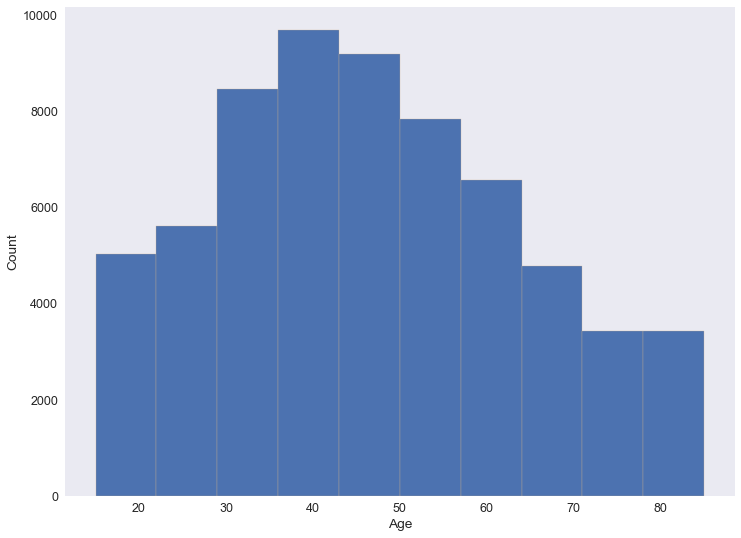

In [61]:
# age distribution of respondents 
print("Age stats")
print("Mean:{:.1f}".format(train['Age'].mean()))
print("Median:",train['Age'].median())
print("Mode:",train['Age'].value_counts().index[0])
ax=train['Age'].hist(edgecolor='tan',figsize=(12, 9));
ax.grid(False);
ax.set_xlabel('Age');
ax.set_ylabel('Count');

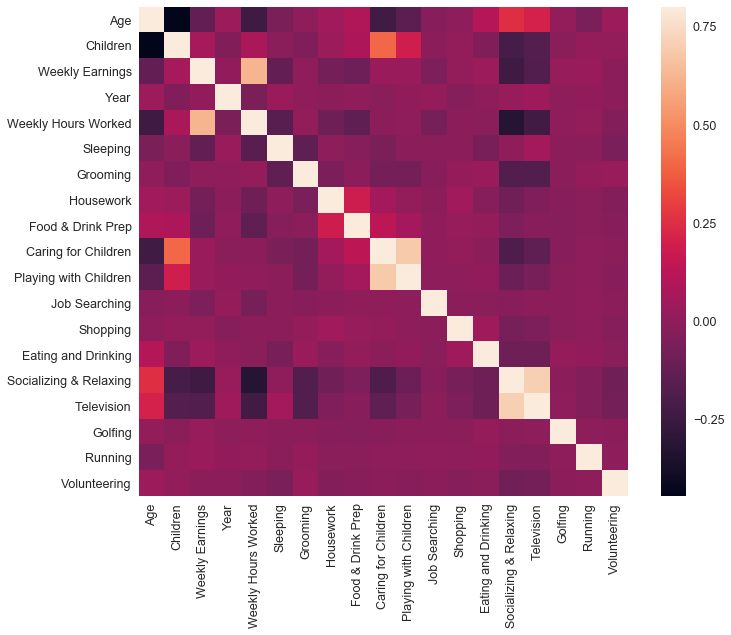

In [20]:
corrmat = train.drop(["Id","Total"],axis=1).corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

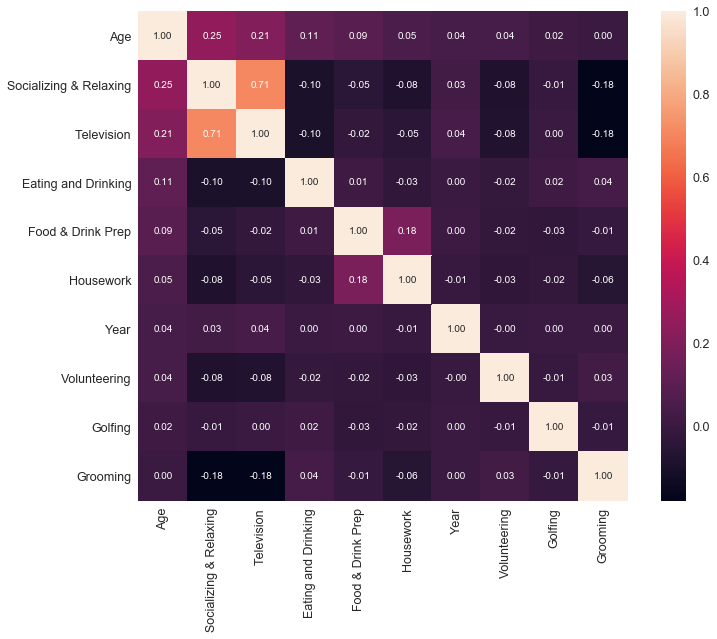

In [21]:
#age correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Age')['Age'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

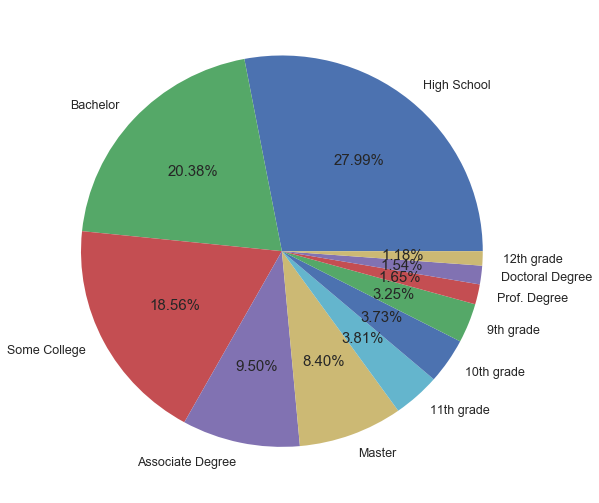

In [22]:
ax=train['Education Level'].value_counts().plot.pie(figsize=(9, 9),autopct='%.2f%%')
ax.set_ylabel('');

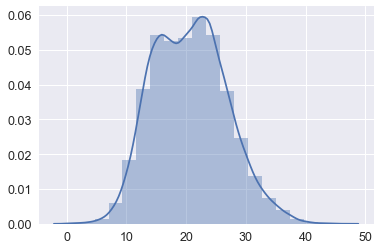

In [126]:
check = train.iloc[:,10:24]
check = check / 60
sns.distplot((check.sum(axis = 1)),bins=20)

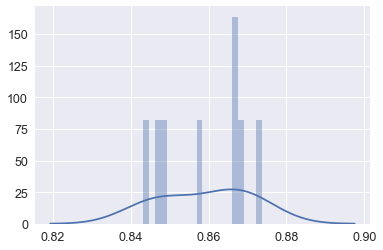

In [127]:
# t = train[train.Year == 2009]
pie = train.groupby(['Year']).mean().iloc[:,5:19]
pie = pie / (60*24)
sns.distplot((pie.sum(axis = 1)),bins=20)

## 3. How time spend on baby care is changing based on education, working hours, income. (consider all years). Other factors can also be considered.

**Preparing data**

In [24]:
#create dummy variable for 'Education level', 'Age Range', 'Employment Status', 'Gender'
edu = pd.get_dummies(train['Education Level']).astype('int')
agerange = pd.get_dummies(train['Age Range']).astype('int')
emp = pd.get_dummies(train['Employment Status']).astype('int')
gender = pd.get_dummies(train['Gender']).astype('int')

#combine the dummy variables with train dataset, called df
df = pd.concat([train, edu, agerange, emp, gender], axis=1)      

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 49 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null int64
Grooming                  64006 non-null int64
Housework                 64006 non-null int64
Food & Drink Prep         64006 non-null int64
Caring for Children       64006 non-null int64
Playing with Children     64006 non-null int64
Job Searching             64006 non-null int64
Shopping                  64006 non-null int64
Eating and Drinking       64006 non-null 

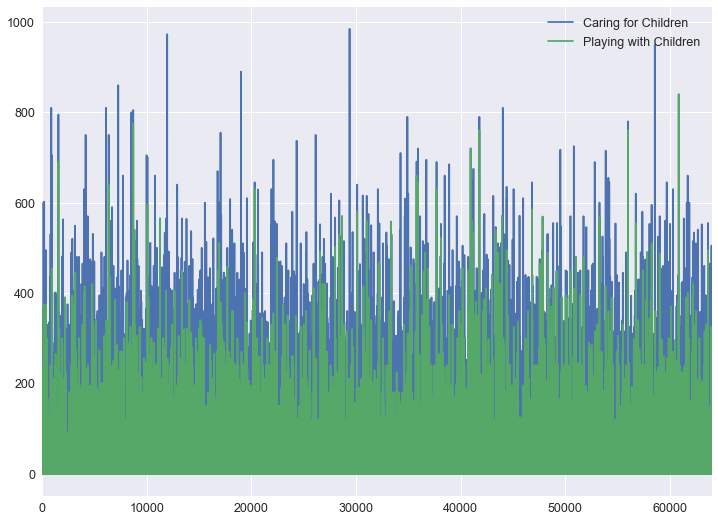

In [25]:
df[['Caring for Children','Playing with Children']].plot(figsize=(12, 9))

In [26]:
y_bc = df['Caring for Children']

'''Age, Children, Weekly Earnings, Sleeping, Grooming, Housework, 
Food & Drink Prep, Playing with Children, Job Searching, Shopping, 
Eating and Drinking, Socializing & Relaxing,Golfing, Running, Volunteering    
'''

'''10th grade, 11th grade, 12th grade, 9th grade, Associate Degree, 
Bachelor, Doctoral Degree, High School, Master, Prof. Degree, Some College
'''

'''Employed, Not in labor force, Unemployed, Female, Male
'''


X_bc = df[['Age', 'Children', 'Weekly Earnings', 'Sleeping', 'Grooming', 'Housework', 
           'Food & Drink Prep', 'Playing with Children', 'Job Searching', 'Shopping', 
           'Eating and Drinking', 'Socializing & Relaxing', 'Golfing', 'Running', 
           'Volunteering','10th grade', '11th grade', '12th grade', '9th grade', 
           'Associate Degree', 'Bachelor', 'Doctoral Degree', 'High School', 
           'Master', 'Prof. Degree', 'Some College', 'Employed', 'Not in labor force', 
           'Unemployed', 'Female', 'Male']]


#split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, random_state=0)

In [27]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Caring for Children   R-squared:                       0.591
Model:                             OLS   Adj. R-squared:                  0.591
Method:                  Least Squares   F-statistic:                     2476.
Date:                 Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                         22:59:00   Log-Likelihood:            -2.5457e+05
No. Observations:                48004   AIC:                         5.092e+05
Df Residuals:                    47975   BIC:                         5.094e+05
Df Model:                           28                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age               

linear model coeff (w): [-2.79e-01  1.68e+01 -4.85e-04 -3.25e-02 -1.00e-01 -4.49e-03  6.79e-02
  1.19e+00 -1.61e-03 -1.26e-02 -2.39e-02 -2.75e-02 -1.99e-02 -9.05e-02
 -2.92e-02 -1.81e+01 -9.92e+00 -5.63e+00 -2.17e+01  4.81e+00  1.15e+01
  1.18e+01  2.03e+00  9.72e+00  1.27e+01  2.76e+00 -6.65e+00  6.61e+00
  4.96e-02  6.36e+00 -6.36e+00]
linear model intercept (b): 45.296
R-squared score (training): 0.591
R-squared score (test): 0.570
MAE: 26.328451866378746
MSE: 2470.4767681740605
RMSE: 49.703890875605104


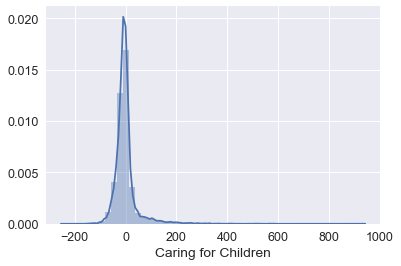

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.feature_selection import RFE
lm = LinearRegression()
results = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print('linear model coeff (w): {}'.format(lm.coef_))
print('linear model intercept (b): {:.3f}'.format(lm.intercept_))
print('R-squared score (training): {:.3f}'.format(lm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lm.score(X_test, y_test)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

sns.distplot((y_test-predictions),bins=50);

## 7. Which is the most significant variable effecting the employment as well as unemployment.

### Prepare Data; Use 'Epmloy status' as dependent variable; 

In [63]:
#Use 'Age', 'Children', 'Weekly Earnings', 'Sleeping', 'Grooming', 'Housework','Food & Drink Prep', 
#'Caring for Children','Playing with Children', 'Job Searching', 'Shopping','Eating and Drinking', 
#'Socializing & Relaxing', 'Golfing', 'Running', 'Volunteering','10th grade', '11th grade', '12th grade', 
#'9th grade', 'Associate Degree', 'Bachelor', 'Doctoral Degree', 'High School', 'Master', 'Prof. Degree', 
#'Some College','Female', 'Male'

y_sig = df['Employed']

X_sig = df[['Age', 'Children', 'Weekly Earnings', 'Sleeping', 'Grooming', 'Housework',
            'Food & Drink Prep', 'Caring for Children','Playing with Children', 'Job Searching',
            'Shopping','Eating and Drinking', 'Socializing & Relaxing', 'Golfing', 'Running', 
            'Volunteering','10th grade', '11th grade', '12th grade', '9th grade', 
            'Associate Degree', 'Bachelor', 'Doctoral Degree', 'High School', 
            'Master', 'Prof. Degree', 'Some College','Female', 'Male']]

### Logistic Regression

In [75]:
import statsmodels.formula.api as smf

# logit = y_sig~X_sig
logdf = pd.concat([y_sig,X_sig],axis=1)

model = smf.logit(y_sig~.,logdf)
results = model.fit()
print(results.summary())

SyntaxError: invalid syntax (<ipython-input-75-10207c78fcad>, line 6)

In [65]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_sig, y_sig, random_state = 0)

log = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.94
Accuracy of Logistic regression classifier on test set: 0.94


In [ ]:
#This is logsitic regression, how to find significant?
#If use stb it should be linear reg

## 8. Predict the values for employment variable in the test data set 

In [68]:
y_emp = train['Employment Status']

X_emp = df[['Age', 'Children', 'Weekly Earnings', 'Sleeping', 'Grooming', 'Housework',
            'Food & Drink Prep', 'Caring for Children','Playing with Children', 'Job Searching',
            'Shopping','Eating and Drinking', 'Socializing & Relaxing', 'Golfing', 'Running', 
            'Volunteering','10th grade', '11th grade', '12th grade', '9th grade', 
            'Associate Degree', 'Bachelor', 'Doctoral Degree', 'High School', 
            'Master', 'Prof. Degree', 'Some College','Female', 'Male']]

target_emp = ['Employed', 'Not in labor force', 'Unemployed']


#split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_emp, y_emp, random_state=0)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
#X_test_scaled = scaler.transform(X_test)

In [69]:
#create dummy variable for 'Education level', 'Age Range', 'Employment Status', 'Gender'
edu = pd.get_dummies(predict['Education Level']).astype('int')
agerange = pd.get_dummies(predict['Age Range']).astype('int')
gender = pd.get_dummies(predict['Gender']).astype('int')

#combine the dummy variables with train dataset, called df
tdf = pd.concat([predict, edu, agerange, gender], axis=1)      

X_pred = tdf[['Age', 'Children', 'Weekly Earnings', 'Sleeping', 'Grooming', 'Housework',
            'Food & Drink Prep', 'Caring for Children','Playing with Children', 'Job Searching',
            'Shopping','Eating and Drinking', 'Socializing & Relaxing', 'Golfing', 'Running', 
            'Volunteering','10th grade', '11th grade', '12th grade', '9th grade', 
            'Associate Degree', 'Bachelor', 'Doctoral Degree', 'High School', 
            'Master', 'Prof. Degree', 'Some College','Female', 'Male']]

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.86


### K-Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier

for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    print('Accuracy of K-NN=',i,'classifier on training set: {:.2f}'
         .format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN=',i,'classifier on test set: {:.2f}'
         .format(knn.score(X_test, y_test)))

#looks like 5 is best, 0.87

Accuracy of K-NN= 1 classifier on training set: 1.00
Accuracy of K-NN= 1 classifier on test set: 0.84
Accuracy of K-NN= 2 classifier on training set: 0.92
Accuracy of K-NN= 2 classifier on test set: 0.84
Accuracy of K-NN= 3 classifier on training set: 0.91
Accuracy of K-NN= 3 classifier on test set: 0.85
Accuracy of K-NN= 4 classifier on training set: 0.90
Accuracy of K-NN= 4 classifier on test set: 0.86
Accuracy of K-NN= 5 classifier on training set: 0.90
Accuracy of K-NN= 5 classifier on test set: 0.87
Accuracy of K-NN= 6 classifier on training set: 0.90
Accuracy of K-NN= 6 classifier on test set: 0.87
Accuracy of K-NN= 7 classifier on training set: 0.89
Accuracy of K-NN= 7 classifier on test set: 0.87
Accuracy of K-NN= 8 classifier on training set: 0.89
Accuracy of K-NN= 8 classifier on test set: 0.87
Accuracy of K-NN= 9 classifier on training set: 0.89
Accuracy of K-NN= 9 classifier on test set: 0.87


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

for i in range (1,10):
    dtree = DecisionTreeClassifier(max_depth = i)
    dtree.fit(X_train, y_train)

    print('Accuracy of Decision Tree=',i,' classifier on training set: {:.2f}'
         .format(dtree.score(X_train, y_train)))
    print('Accuracy of Decision Tree=',i,' classifier on test set: {:.2f}'
         .format(dtree.score(X_test, y_test)))

#looks like 3 is best, 0.88

Accuracy of Decision Tree= 1  classifier on training set: 0.87
Accuracy of Decision Tree= 1  classifier on test set: 0.87
Accuracy of Decision Tree= 2  classifier on training set: 0.87
Accuracy of Decision Tree= 2  classifier on test set: 0.87
Accuracy of Decision Tree= 3  classifier on training set: 0.88
Accuracy of Decision Tree= 3  classifier on test set: 0.88
Accuracy of Decision Tree= 4  classifier on training set: 0.88
Accuracy of Decision Tree= 4  classifier on test set: 0.88
Accuracy of Decision Tree= 5  classifier on training set: 0.89
Accuracy of Decision Tree= 5  classifier on test set: 0.89
Accuracy of Decision Tree= 6  classifier on training set: 0.90
Accuracy of Decision Tree= 6  classifier on test set: 0.90
Accuracy of Decision Tree= 7  classifier on training set: 0.90
Accuracy of Decision Tree= 7  classifier on test set: 0.90
Accuracy of Decision Tree= 8  classifier on training set: 0.90
Accuracy of Decision Tree= 8  classifier on test set: 0.90
Accuracy of Decision Tre

In [71]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("pred") 

### Support Vector Machine

In [ ]:
from sklearn import svm

X_trains = X_train[:len(X_train)//100] 
y_trains = y_train[:len(y_train)//100] 

svm = svm.SVC(kernel='rbf', C=10000)
svm.fit(X_trains, y_trains)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(svm.score(X_trains, y_trains)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.90


### AdaBoost

### Random Forest